In [1]:
#loading the data file
import pandas as pd
df = pd.read_parquet('part1_small.parquet.gzip')

In [2]:
import pandas as pd
import numpy as np

import sklearn

import seaborn as sns

import statsmodels.api 
import sklearn.feature_selection 
import sklearn.linear_model  
import sklearn.model_selection

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
#printing the 40 rows of the data
print('Printing the 40 rows of the data\n', df.head(40))


Printing the 40 rows of the data
         LATITUDE     LONGITUDE    ELEVATION                     AGENCY  \
0   5.162364e+06 -1.370879e+07   824.563354             Forest Service   
1   5.162364e+06 -1.370869e+07   830.883362             Forest Service   
2   5.162364e+06 -1.370859e+07   877.235413             Forest Service   
3   5.162364e+06 -1.370849e+07   899.555420             Forest Service   
4   5.162364e+06 -1.370839e+07   860.095459             Forest Service   
5   5.162364e+06 -1.370829e+07   838.793884             Forest Service   
6   5.162364e+06 -1.370819e+07   801.053894             Forest Service   
7   5.162364e+06 -1.370799e+07   813.880188             Forest Service   
8   5.162364e+06 -1.362488e+07  1016.208130  Bureau of Land Management   
9   5.162364e+06 -1.362478e+07  1016.728088  Bureau of Land Management   
10  5.162364e+06 -1.362468e+07  1016.149353  Bureau of Land Management   
11  5.162364e+06 -1.362458e+07  1016.649353                  No Agency   
12  

In [4]:
#checking the shape of the entire data
print('Printing the shape of the data', df.shape)

Printing the shape of the data (64988462, 13)


In [5]:
#performing discriptive statistics for all the columns except for latitude 
#and logitude

df.describe(include='all')


,LATITUDE,LONGITUDE,ELEVATION,AGENCY,GROUNDCOVER_2019,GROUNDCOVER_2020,GROUNDCOVER_2021,DROUGHT_2019,DROUGHT_2020,DROUGHT_2021,FIRE_2019,FIRE_2020,FIRE_2021
count,6.498846e+07,6.498846e+07,6.498846e+07,64988462,64988462,64988462,64988462,64988462,64988462,64988462,6.498846e+07,6.498846e+07,6.498846e+07
unique,NaN,NaN,NaN,7,17,17,17,2,5,5,NaN,NaN,NaN
top,NaN,NaN,NaN,No Agency,Shrub/Scrub,Shrub/Scrub,Shrub/Scrub,No Drought,No Drought,D4,NaN,NaN,NaN
freq,NaN,NaN,NaN,33940997,25805960,25805960,25805960,62359834,20468339,30216309,NaN,NaN,NaN
mean,4.492257e+06,-1.332271e+07,8.655801e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.857061e-03,4.223605e-02,2.636666e-02
std,3.630395e+05,2.767882e+05,7.394619e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.337507e-02,2.011272e-01,1.602232e-01
min,3.833664e+06,-1.384920e+07,-1.025498e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.185890e+06,-1.353697e+07,2.380613e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.452210e+06,-1.336986e+07,7.154799e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.808837e+06,-1.309784e+07,1.336547e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00


In [6]:
#finding the unique values for the ground cover and drought 
print("finding the unique values for the ground cover for 2019", df['GROUNDCOVER_2019'].unique())
print("finding the unique values for the ground cover for 2020", df['GROUNDCOVER_2020'].unique())
print("finding the unique values for the ground cover for 2021", df['GROUNDCOVER_2021'].unique())

print(df['DROUGHT_2021'].unique())
print(df['DROUGHT_2019'].unique())
print(df['DROUGHT_2020'].unique())


finding the unique values for the ground cover for 2019 ['Evergreen Forest' 'Herbaceous' 'Shrub/Scrub' 'Deciduous Forest'
 'Developed, Open Space' 'Barren Land' 'Mixed Forest'
 'Developed, Low Intensity' 'Developed, Medium Intensity' 'Open Water'
 'Woody Wetlands' 'Developed, High Intensity'
 'Emergent Herbaceous Wetlands' 'Cultivated Crops' 'Hay/Pasture'
 'Unclassified' 'Perennial Snow/Ice']
finding the unique values for the ground cover for 2020 ['Evergreen Forest' 'Herbaceous' 'Shrub/Scrub' 'Deciduous Forest'
 'Developed, Open Space' 'Barren Land' 'Mixed Forest'
 'Developed, Low Intensity' 'Developed, Medium Intensity' 'Open Water'
 'Woody Wetlands' 'Developed, High Intensity'
 'Emergent Herbaceous Wetlands' 'Cultivated Crops' 'Hay/Pasture'
 'Unclassified' 'Perennial Snow/Ice']
finding the unique values for the ground cover for 2021 ['Evergreen Forest' 'Herbaceous' 'Shrub/Scrub' 'Deciduous Forest'
 'Developed, Open Space' 'Barren Land' 'Mixed Forest'
 'Developed, Low Intensity' 'Dev

In [7]:
#df1 = df

In [6]:
#Since the data is very huge and there are many categorical data for ground cover. 
#When creating a dummy variable for ground cover the number of columns will increase 
#Hence considering only 1 year wildfire data for the state of California
df1 = df.drop(['GROUNDCOVER_2019', 'GROUNDCOVER_2021', 'DROUGHT_2019', 'DROUGHT_2021', 'FIRE_2019', 'FIRE_2021'], axis=1)

In [7]:
#Since the data is very large random smapling of the data is done
new_df = df1.sample(n=100000)

In [158]:
#reseting the index after sampling the data from 64 million to 100,000
new_df = new_df.reset_index()

In [159]:
print("printing the 20 rows of the sampled dataset\n", new_df.head(20))
#checking the shape of the new dataframe
print("Checking the shape of the data set", new_df.shape)

printing the 20 rows of the sampled dataset
     level_0     index      LATITUDE     LONGITUDE    ELEVATION  \
0         0   5846430  5.033954e+06 -1.371949e+07  1111.558594   
1         1  56933512  4.060481e+06 -1.276981e+07   501.241913   
2         2  44806009  4.246595e+06 -1.286532e+07  1520.147949   
3         3   9841081  4.948647e+06 -1.344947e+07  1558.026001   
4         4  29629054  4.505814e+06 -1.340786e+07    87.521255   
5         5  21525230  4.683628e+06 -1.364548e+07   343.412933   
6         6  50457827  4.159788e+06 -1.331445e+07   735.330872   
7         7  26273801  4.577220e+06 -1.353227e+07    -5.306202   
8         8  48378994  4.191391e+06 -1.287072e+07  1273.922485   
9         9  42122119  4.288498e+06 -1.339066e+07   943.877380   
10       10  11197833  4.920845e+06 -1.358788e+07   197.696686   
11       11  30221077  4.494313e+06 -1.340906e+07    69.897385   
12       12   3575809  5.083858e+06 -1.351407e+07  1305.833374   
13       13  23714158  4.633524

<AxesSubplot:>

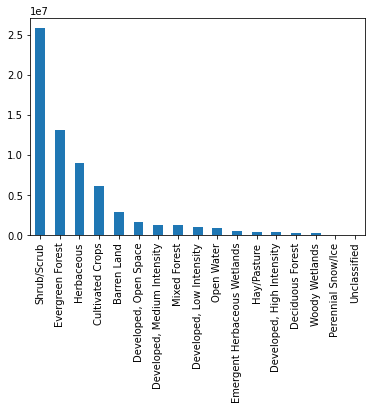

In [161]:
#To understand how the data is present for the categorical columns which are 
#ground cover and drought bar plots are plotted

#Bar plot of ground cover
df['GROUNDCOVER_2020'].value_counts().plot(kind='bar')

<AxesSubplot:>

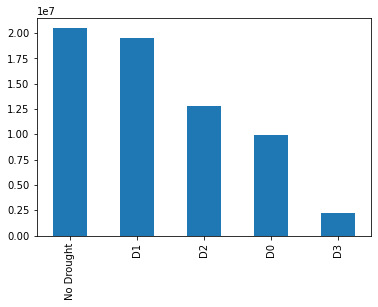

In [162]:
#Bar plot of different levels of drought
df['DROUGHT_2020'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frequency')

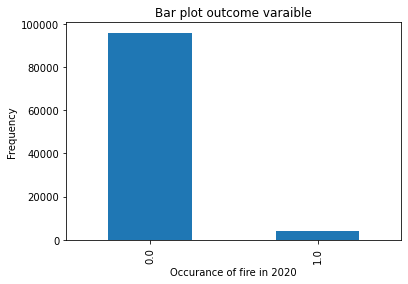

In [164]:
#Bar plot of occuarance of fire
ax = new_df['FIRE_2020'].value_counts().plot(kind='bar')
ax.set_title("Bar plot outcome varaible")
ax.set_xlabel("Occurance of fire in 2020")
ax.set_ylabel("Frequency")

In [10]:
#Now creating dummy variables for drought column and ground cover.
#Since the data present in these 2 columns are categorical and is also nominal
#grouping them into one category can't be done hence creating dummy variable columns for 
#these 2 columns

new_df = pd.get_dummies(new_df, columns = ['GROUNDCOVER_2020', 'DROUGHT_2020'], drop_first= True)
print("Printing the dataset for preview\n", new_df.head(5))

Printing the dataset for preview
       index      LATITUDE     LONGITUDE    ELEVATION  \
0   5846430  5.033954e+06 -1.371949e+07  1111.558594   
1  56933512  4.060481e+06 -1.276981e+07   501.241913   
2  44806009  4.246595e+06 -1.286532e+07  1520.147949   
3   9841081  4.948647e+06 -1.344947e+07  1558.026001   
4  29629054  4.505814e+06 -1.340786e+07    87.521255   

                      AGENCY  FIRE_2020  GROUNDCOVER_2020_Cultivated Crops  \
0             Forest Service        1.0                                  0   
1  Bureau of Land Management        0.0                                  0   
2  Bureau of Land Management        0.0                                  0   
3                  No Agency        0.0                                  0   
4                  No Agency        0.0                                  0   

   GROUNDCOVER_2020_Deciduous Forest  \
0                                  0   
1                                  0   
2                                  0   


In [11]:
print("Printing the shape of the new dataset" , new_df.shape)

Printing the shape of the new dataset (100000, 26)


In [13]:
#Now considering the outcome variable which will be Fire 2020, and 
#Elevation, Drought 2020, Ground Cover 2020 will be independent or x variables

y = new_df[['FIRE_2020']]
x = new_df.iloc[:, 6:25]
x['ELEVATION'] = new_df['ELEVATION'] 

print("Printing the head of the outcome variable \n", y.head(5))
print("Printing the head of the independent variable \n", x.head(5))

Printing the head of the outcome variable 
    FIRE_2020
0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
Printing the head of the independent variable 
    GROUNDCOVER_2020_Cultivated Crops  GROUNDCOVER_2020_Deciduous Forest  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   GROUNDCOVER_2020_Developed, High Intensity  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   GROUNDCOVER_2020_Developed, Low Intensity  \
0                                   

In [14]:
#Now using Recursive feature elimation using sklearn.feature_selection to find 
#optimal number of or best number of features, using step =1 and cv =10

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

modelX = LogisticRegression(max_iter=100000)
min_features_to_select= 1 #Minimum number of features to consider
rfecv = RFECV(estimator = modelX, step=1, cv=10, scoring='accuracy', 
              min_features_to_select= min_features_to_select)
rfecv = rfecv.fit(x, y.values.ravel())

In [15]:
print("The number of features selected is {} and features names that were selected (column names) is: \n {}, {}"
     .format(rfecv.n_features_, 
      x.columns[rfecv.support_], rfecv.support_))

The number of features selected is 1 and features names that were selected (column names) is: 
 Index(['GROUNDCOVER_2020_Cultivated Crops'], dtype='object'), [ True False False False False False False False False False False False
 False False False False False False False False]


C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


Printing the average accuracy of each variable and its length
  [0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998] 20


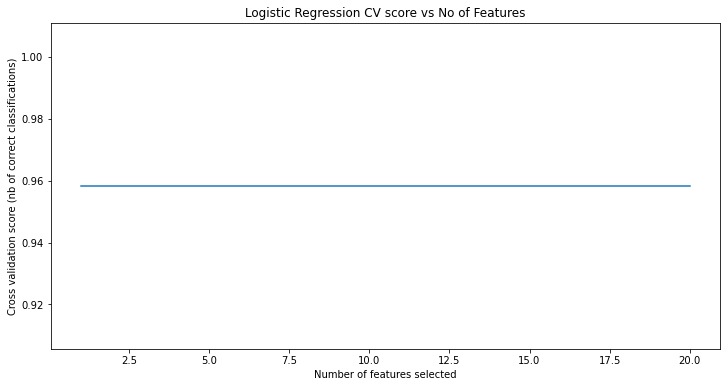

In [16]:
import numpy as np
import matplotlib.pyplot as plt
a =[]
for i in range(0, len(rfecv.grid_scores_)):
    a.append(np.mean(rfecv.grid_scores_[i]))

print("Printing the average accuracy of each variable and its length\n ", a, len(a))

#plotting a graph using grid_score_ to show the cross-validation scores
plt.figure(figsize=(12,6))
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select, len(a) + min_features_to_select), a) #taking the avg of grid scores
plt.show()    

In [17]:
#################
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator= model, n_features_to_select= 10)
fit = rfe.fit(x, y.values.ravel())
print("printing which columns or features are selcted in true or false\n", rfe.support_)
print("Printing the rank of each column\n", rfe.ranking_)

printing which columns or features are selcted in true or false
 [ True  True False False  True  True False  True False  True  True False
 False  True False  True False  True False False]
Printing the rank of each column
 [ 1  1  2  6  1  1  7  1  3  1  1  8  9  1 10  1  4  1  5 11]


In [18]:
#Since the above plot shows the accuracy to be the same for all the columns 
#it is better to consider all the columns and run a model
y.value_counts()

FIRE_2020
0.0          95837
1.0           4163
dtype: int64

In [19]:
#Since the data is still to large, the data will have to be split into 
#training and testing data, where the test will be of 30% and training data
#will be of 70%
#test_size = 0.3

X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size= 0.3, random_state = 0)
print("Printing the shape of test and train data", X_train.shape, X_test.shape)
    

Printing the shape of test and train data (70000, 20) (30000, 20)


In [20]:
#Trying different parameters to get the best hyper-parameter
logisticRegr = LogisticRegression(max_iter=10000)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator = logisticRegr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search = grid_search.fit(X_train, y_train.values.ravel()) 

In [21]:
# summarizing the result
print('Best Score: %s' % grid_search.best_score_)
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Score: 0.9583999999999999
Best Hyperparameters: {'C': 0.001}


In [122]:
#Building Logistic Regression model
params = {'C':0.001}
X_train = sm.add_constant(X_train, prepend= False)
logit_mod = sm.Logit(y_train, X_train, params)
logit_res = logit_mod.fit()
print("Printing the Logistic regression model summary\n", logit_res.summary())


#Here threshold 0.1 means, if the predicted value is greater than 0.1 then it will be converted to 1
#else if it is less than 0.1 the predicted outcome variavle will be 0
#since the number of occurences of 1 is very less it is better to consider lesser threshold value
threshold =0.1

# Probability Distribution for Training data
prob_train = logit_res.predict(X_train)
X_test = sm.add_constant(X_test, prepend= False)
prob_test = logit_res.predict(X_test)

y_predicted_train = np.array(prob_train >= threshold).astype(np.int8) 
y_predicted_test = np.array(prob_test >= threshold).astype(np.int8)

         Current function value: 0.149825
         Iterations: 35


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Printing the Logistic regression model summary
                            Logit Regression Results                           
Dep. Variable:              FIRE_2020   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69979
Method:                           MLE   Df Model:                           20
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.1339
Time:                        20:24:38   Log-Likelihood:                -10488.
converged:                      False   LL-Null:                       -12110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
GROUNDCOVER_2020_Cultivated Crops                -1.7454      0.868     -2.011      0.044   

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [123]:
#Building Logistic Regression model
params = {'C':0.001}
X_train = sm.add_constant(X_train, prepend= False)
logit_mod = sm.Logit(y_train, X_train, params)
logit_res = logit_mod.fit()
print("Printing the Logistic regression model summary\n", logit_res.summary())


#Here threshold 0.1 means, if the predicted value is greater than 0.1 then it will be converted to 1
#else if it is less than 0.1 the predicted outcome variavle will be 0
#since the number of occurences of 1 is very less it is better to consider lesser threshold value
threshold =0.1

# Probability Distribution for Training data
prob_train = logit_res.predict(X_train)
X_test = sm.add_constant(X_test, prepend= False)
prob_test = logit_res.predict(X_test)

y_predicted_train = np.array(prob_train >= threshold).astype(np.int8) 
y_predicted_test = np.array(prob_test >= threshold).astype(np.int8)

         Current function value: 0.149825
         Iterations: 35


C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Printing the Logistic regression model summary
                            Logit Regression Results                           
Dep. Variable:              FIRE_2020   No. Observations:                70000
Model:                          Logit   Df Residuals:                    69979
Method:                           MLE   Df Model:                           20
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.1339
Time:                        20:24:50   Log-Likelihood:                -10488.
converged:                      False   LL-Null:                       -12110.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
GROUNDCOVER_2020_Cultivated Crops                -1.7454      0.868     -2.011      0.044   

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
# Confusion matrix and accuracy score

# confusion matrix
cm = confusion_matrix(y_train, y_predicted_train)
cmtest = confusion_matrix(y_test, y_predicted_test)
print("Confusion Matrix training data : \n", cm)
print ("Confusion Matrix testing data: \n", cmtest)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, y_predicted_test))
print('Train accuracy = ', accuracy_score(y_train, y_predicted_train))

Confusion Matrix training data : 
 [[60843  6245]
 [ 1870  1042]]
Confusion Matrix testing data: 
 [[26109  2640]
 [  828   423]]
Test accuracy =  0.8844
Train accuracy =  0.8840714285714286


<AxesSubplot:>

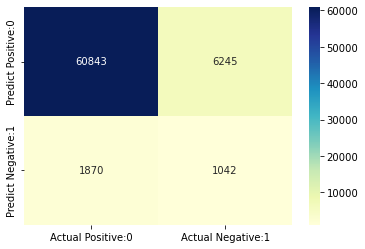

In [24]:
#plotting the confusion matrix for training data

cm_matrix_train = pd.DataFrame(data=cm, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix_train, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot:>

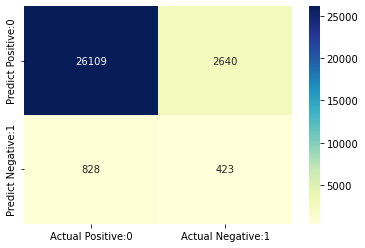

In [25]:
#plotting the confusion matrix for testing data

cm_matrix_test = pd.DataFrame(data=cmtest, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix_test, annot=True, fmt='d', cmap='YlGnBu')

In [26]:
# Try different threshold values
accuracies_test = []
accuracies_train = []

threshold_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for th in threshold_values:
    y_test_preds = (prob_test >= th).astype(np.int8)
    accTe = accuracy_score(y_test,y_test_preds)
    cmtest1 = confusion_matrix(y_test, y_test_preds)
    print("Printing the threshold value: {}, its test accuracy: {} and confusion matrix: \n {}"
    .format(th, accTe, cmtest1))
    accuracies_test.append(accTe)
    y_train_preds = (prob_train >= th).astype(np.int8)
    accTr = accuracy_score(y_train,y_train_preds)
    accuracies_train.append(accTr)

Printing the threshold value: 0.1, its test accuracy: 0.8844 and confusion matrix: 
 [[26109  2640]
 [  828   423]]
Printing the threshold value: 0.2, its test accuracy: 0.9528666666666666 and confusion matrix: 
 [[28525   224]
 [ 1190    61]]
Printing the threshold value: 0.3, its test accuracy: 0.9583333333333334 and confusion matrix: 
 [[28749     0]
 [ 1250     1]]
Printing the threshold value: 0.4, its test accuracy: 0.9583 and confusion matrix: 
 [[28749     0]
 [ 1251     0]]
Printing the threshold value: 0.5, its test accuracy: 0.9583 and confusion matrix: 
 [[28749     0]
 [ 1251     0]]
Printing the threshold value: 0.6, its test accuracy: 0.9583 and confusion matrix: 
 [[28749     0]
 [ 1251     0]]
Printing the threshold value: 0.7, its test accuracy: 0.9583 and confusion matrix: 
 [[28749     0]
 [ 1251     0]]
Printing the threshold value: 0.8, its test accuracy: 0.9583 and confusion matrix: 
 [[28749     0]
 [ 1251     0]]
Printing the threshold value: 0.9, its test accu

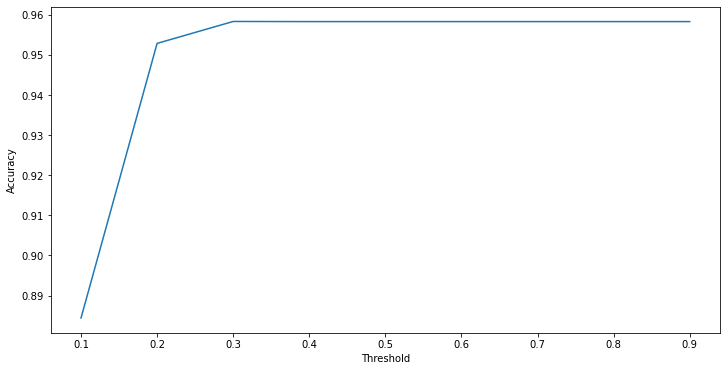

In [27]:
# Plot threshold value VS. accuracy

# ploting threshold value VS. the accuracy values
plt.figure(figsize=(12,6))
plt.plot(threshold_values, accuracies_test)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show() 

In [28]:
#Now considering all the 3 years but with sample size of 10,000 for each year
print("Printing the head of the actual dataframe \n", df.head(10))

Printing the head of the actual dataframe 
        LATITUDE     LONGITUDE    ELEVATION                     AGENCY  \
0  5.162364e+06 -1.370879e+07   824.563354             Forest Service   
1  5.162364e+06 -1.370869e+07   830.883362             Forest Service   
2  5.162364e+06 -1.370859e+07   877.235413             Forest Service   
3  5.162364e+06 -1.370849e+07   899.555420             Forest Service   
4  5.162364e+06 -1.370839e+07   860.095459             Forest Service   
5  5.162364e+06 -1.370829e+07   838.793884             Forest Service   
6  5.162364e+06 -1.370819e+07   801.053894             Forest Service   
7  5.162364e+06 -1.370799e+07   813.880188             Forest Service   
8  5.162364e+06 -1.362488e+07  1016.208130  Bureau of Land Management   
9  5.162364e+06 -1.362478e+07  1016.728088  Bureau of Land Management   

   GROUNDCOVER_2019  GROUNDCOVER_2020  GROUNDCOVER_2021 DROUGHT_2019  \
0  Evergreen Forest  Evergreen Forest  Evergreen Forest   No Drought   
1  Everg

In [93]:
#considering only 10,000 sample
new_df3y = df.sample(n=10000)
print("printing the head of the new sampled dataframe \n", new_df3y.head(10))

printing the head of the new sampled dataframe 
               LATITUDE     LONGITUDE    ELEVATION                     AGENCY  \
13054652  4.882142e+06 -1.335856e+07  1213.457275                  No Agency   
41286594  4.301799e+06 -1.339296e+07   390.563904                  No Agency   
698051    5.146062e+06 -1.350837e+07  1230.393799                  No Agency   
748851    5.144962e+06 -1.358098e+07  1293.465088             Forest Service   
54927923  4.093983e+06 -1.327445e+07  1028.322144             Forest Service   
32709525  4.448310e+06 -1.345507e+07    36.128983                  No Agency   
29009691  4.518215e+06 -1.314324e+07  2066.158691             Forest Service   
40173797  4.319600e+06 -1.343627e+07   830.076538                  No Agency   
47478268  4.204992e+06 -1.307553e+07   778.926147  Bureau of Land Management   
4117728   5.071857e+06 -1.363658e+07  1845.415771             Forest Service   

          GROUNDCOVER_2019  GROUNDCOVER_2020  GROUNDCOVER_2021 DROUGHT

In [94]:
new_df3y.reset_index(drop=True)

,LATITUDE,LONGITUDE,ELEVATION,AGENCY,GROUNDCOVER_2019,GROUNDCOVER_2020,GROUNDCOVER_2021,DROUGHT_2019,DROUGHT_2020,DROUGHT_2021,FIRE_2019,FIRE_2020,FIRE_2021
0,4.882142e+06,-1.335856e+07,1213.457275,No Agency,Barren Land,Barren Land,Barren Land,No Drought,D1,D3,0.0,0.0,0.0
1,4.301799e+06,-1.339296e+07,390.563904,No Agency,Herbaceous,Herbaceous,Herbaceous,No Drought,D0,D4,0.0,0.0,0.0
2,5.146062e+06,-1.350837e+07,1230.393799,No Agency,Cultivated Crops,Cultivated Crops,Cultivated Crops,No Drought,D2,D4,0.0,0.0,0.0
3,5.144962e+06,-1.358098e+07,1293.465088,Forest Service,Herbaceous,Herbaceous,Herbaceous,No Drought,D3,D4,0.0,0.0,0.0
4,4.093983e+06,-1.327445e+07,1028.322144,Forest Service,Herbaceous,Herbaceous,Herbaceous,No Drought,No Drought,D4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.234394e+06,-1.326455e+07,139.018906,No Agency,Cultivated Crops,Cultivated Crops,Cultivated Crops,No Drought,No Drought,D4,0.0,0.0,0.0
9996,4.200891e+06,-1.327715e+07,93.722473,No Agency,Herbaceous,Herbaceous,Herbaceous,No Drought,No Drought,D4,0.0,0.0,0.0
9997,4.513215e+06,-1.315174e+07,2876.345459,Forest Service,Evergreen Forest,Evergreen Forest,Evergreen Forest,No Drought,D1,D4,0.0,0.0,0.0
9998,4.686528e+06,-1.367209e+07,849.769531,No Agency,Evergreen Forest,Evergreen Forest,Evergreen Forest,No Drought,D2,D4,1.0,0.0,0.0


In [95]:
df3_y = pd.DataFrame(new_df3y[['GROUNDCOVER_2019', 'GROUNDCOVER_2020', 'GROUNDCOVER_2021']].values.T.ravel(), columns=['GROUNDCOVER'])

In [149]:
#now creating ground cover, drought, fire column for all years
#since elevation remain same for all the years this variable will not be considered
df3_yG = pd.DataFrame(new_df3y[['GROUNDCOVER_2019', 'GROUNDCOVER_2020', 'GROUNDCOVER_2021']].values.T.ravel(), columns=['GROUNDCOVER'])
df3_yD = pd.DataFrame(new_df3y[['DROUGHT_2019', 'DROUGHT_2020', 'DROUGHT_2021']].values.T.ravel(), columns=['DROUGHT'])
df3_yF = pd.DataFrame(new_df3y[['FIRE_2019', 'FIRE_2020', 'FIRE_2021']].values.T.ravel(), columns=['FIRE'])

print(df3_yG.shape, df3_yD.shape, df3_yF.shape)
print(df3_yG)


(30000, 1) (30000, 1) (30000, 1)
            GROUNDCOVER
0           Barren Land
1            Herbaceous
2      Cultivated Crops
3            Herbaceous
4            Herbaceous
...                 ...
29995  Cultivated Crops
29996        Herbaceous
29997  Evergreen Forest
29998  Evergreen Forest
29999       Shrub/Scrub

[30000 rows x 1 columns]


In [150]:
#Now concatinating all the 2 which are ground cover and drought into 1 column for x
#and Fire will be y variable

x_all =pd.concat([df3_yG['GROUNDCOVER'] , df3_yD['DROUGHT']], axis=1)

x_all.head(10)

,GROUNDCOVER,DROUGHT
0,Barren Land,No Drought
1,Herbaceous,No Drought
2,Cultivated Crops,No Drought
3,Herbaceous,No Drought
4,Herbaceous,No Drought
5,Cultivated Crops,No Drought
6,Evergreen Forest,No Drought
7,Shrub/Scrub,No Drought
8,Barren Land,No Drought
9,Evergreen Forest,No Drought


<AxesSubplot:>

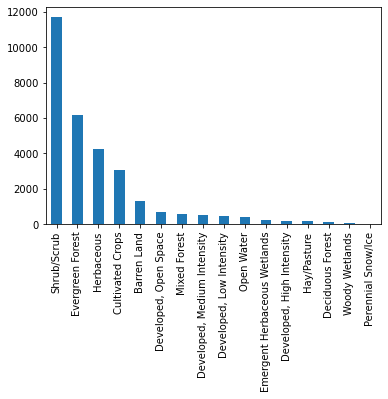

In [151]:
#Bar plot of different ground covers
x_all['GROUNDCOVER'].value_counts().plot(kind='bar')

<AxesSubplot:>

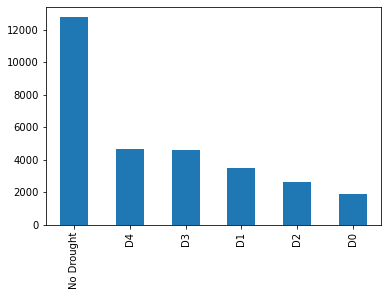

In [152]:
#Bar plot of different levels of drought
x_all['DROUGHT'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frequency')

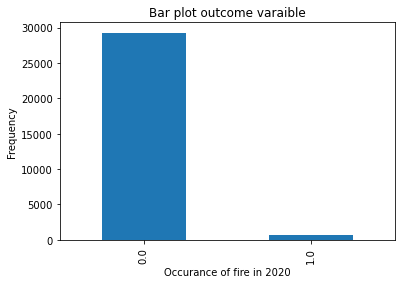

In [153]:
#Bar plot of occuarance of fire
ax = df3_yF['FIRE'].value_counts().plot(kind='bar')
ax.set_title("Bar plot outcome varaible")
ax.set_xlabel("Occurance of fire in 2020")
ax.set_ylabel("Frequency")

In [154]:
#Creating dummy variables for Ground cover and drought
#to match the output generated in first model Logistic regression
#instaed of dropping the first column we drop the columns that were dropped in the first model
x_all = pd.get_dummies(x_all, columns = ['GROUNDCOVER', 'DROUGHT'], drop_first= True)
print("Printing the dataset for preview\n", x_all)

Printing the dataset for preview
        GROUNDCOVER_Cultivated Crops  GROUNDCOVER_Deciduous Forest  \
0                                 0                             0   
1                                 0                             0   
2                                 1                             0   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
29995                             1                             0   
29996                             0                             0   
29997                             0                             0   
29998                             0                             0   
29999                             0                             0   

       GROUNDCOVER_Developed, High Intensity  \
0                                          0   
1                                        

In [40]:
#dropping the column with  DROUGHT_D4, DROUGHT_No Drought 
#x_all = x_all.drop(['DROUGHT_D4', 'DROUGHT_No Drought'], axis=1)
#x_all = x_all.reset_index(drop = True)

In [102]:
#outcome variable will be occurence of fire

y_all = df3_yF

#creating logistic regression model for the x and y variables to performe
#recursive feature elimination, to select 6 features
model1 = LogisticRegression(max_iter=10000)
rfe1 = RFE(estimator= model1, n_features_to_select=6)
fit = rfe1.fit(x_all, y_all.values.ravel())
print("printing which columns or features are selcted in true or false\n", rfe1.support_)
print("Printing the rank of each column\n", rfe1.ranking_)

#Using RFE cross-validation loop to find optimal number of features, using step=1, and cv =10
modelX1 = LogisticRegression(max_iter=10000)
min_features_to_select1= 1 #Minimum number of features to consider
rfecv1 = RFECV(estimator = modelX1, step=1, cv=10, scoring='accuracy',
 min_features_to_select= min_features_to_select1)
rfecv1 = rfecv1.fit(x_all, y_all.values.ravel())
print("Printing which columns were selected in true or false\n", rfecv1.support_)

printing which columns or features are selcted in true or false
 [ True False False False  True False False  True False False  True False
 False False False False  True False False  True]
Printing the rank of each column
 [ 1  2  6  9  1  4 13  1 15  5  1 10 14  3  8 11  1 12  7  1]
Printing which columns were selected in true or false
 [ True False False False False False False False False False False False
 False False False False False False False False]


In [103]:
print("The number of features selected is {} and features names that were selected (column names) is: \n {}"
     .format(rfecv1.n_features_, 
      x_all.columns[rfecv1.support_]))

The number of features selected is 1 and features names that were selected (column names) is: 
 Index(['GROUNDCOVER_Cultivated Crops'], dtype='object')


Printing the average accuracy of each variable and its length
  [0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998, 0.9583699999999998] 20


C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


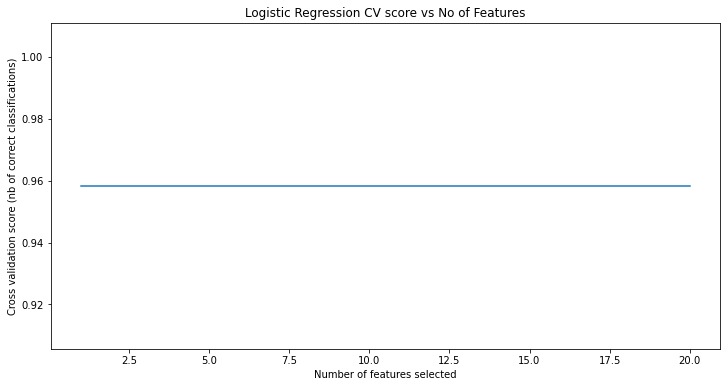

In [104]:
b =[]
for i in range(0, len(rfecv.grid_scores_)):
    b.append(np.mean(rfecv.grid_scores_[i]))

print("Printing the average accuracy of each variable and its length\n ", b, len(b))

#plotting a graph using grid_score_ to show the cross-validation scores
plt.figure(figsize=(12,6))
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select, len(b) + min_features_to_select), b) #taking the avg of grid scores
plt.show()



In [136]:
#converting float 0.0 and 1.0 in y_all to 0 and 1
#y_all['FIRE'] = y_all['FIRE'].astype('int')
########## Remove it if required #########

In [105]:
#splitting the data where training data will be 70% of the data and testing data will be 30% of the data

X_train1, X_test1, y_train1, y_test1  = train_test_split(x_all, y_all, test_size= 0.3, random_state = 0)
print("Printing the shape of test and train data", X_train1.shape, X_test1.shape)

Printing the shape of test and train data (21000, 20) (9000, 20)


In [106]:
#Building the logistic regression model

###Build a Logistic Regression model from statsmodels.api.logit 
X_train1 = sm.add_constant(X_train1, prepend= False)
logit_mod1 = sm.Logit(y_train1, X_train1)
logit_res1 = logit_mod1.fit(disp=0)
print("Printing the Logistic regression model summary\n", logit_res1.summary())


#Here threshold 0.1 means, if the predicted value is greater than 0.1 then it will be converted to 1
#else if it is less than 0.1 the predicted outcome variavle will be 0
threshold =0.1
#considering 0.1 since the number of occurrence of fire over the 2019, 2020, and 2021 is very less
# Probability Distribution for Training data
prob_train1 = logit_res1.predict(X_train1)
X_test1 = sm.add_constant(X_test1, prepend= False)
prob_test1 = logit_res1.predict(X_test1)

y_predicted_train1 = np.array(prob_train1 >= threshold).astype(np.int8) 
y_predicted_test1 = np.array(prob_test1 >= threshold).astype(np.int8)  

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Printing the Logistic regression model summary
                            Logit Regression Results                           
Dep. Variable:                   FIRE   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20979
Method:                           MLE   Df Model:                           20
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.1516
Time:                        20:10:30   Log-Likelihood:                -2045.4
converged:                      False   LL-Null:                       -2410.9
Covariance Type:            nonrobust   LLR p-value:                6.116e-142
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
GROUNDCOVER_Cultivated Crops                -0.3886      1.226     -0.317      0.751      -2.792      

C:\Users\vaibh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [130]:
# confusion matrix
cm1 = confusion_matrix(y_train1, y_predicted_train1)
cmtest1 = confusion_matrix(y_test1, y_predicted_test1)
print("Confusion Matrix training data : \n", cm1)
print ("Confusion Matrix testing data: \n", cmtest1)

# accuracy score of the model
print('Train accuracy = ', accuracy_score(y_train1, y_predicted_train1))
print('Test accuracy = ', accuracy_score(y_test1, y_predicted_test1))

Confusion Matrix training data : 
 [[19976   511]
 [  442    71]]
Confusion Matrix testing data: 
 [[8575  222]
 [ 176   27]]
Train accuracy =  0.9546190476190476
Test accuracy =  0.9557777777777777


<AxesSubplot:>

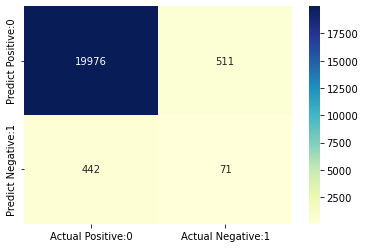

In [131]:
#Confusion matrix for training data
cm_matrix_train1 = pd.DataFrame(data=cm1, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix_train1, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot:>

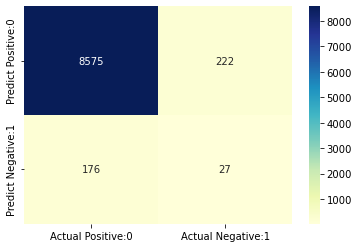

In [132]:
#confusion matrix for testing data
cm_matrix_test1 = pd.DataFrame(data=cmtest1, columns=['Actual Positive:0', 'Actual Negative:1'], 
                                 index=['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix_test1, annot=True, fmt='d', cmap='YlGnBu')

In [133]:
#trying different threshold values

accuracies_test1 = []
accuracies_train2 = []

threshold_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for th in threshold_values:
    y_test_preds1 = (prob_test1 >= th).astype(np.int8)
    accTe1 = accuracy_score(y_test1,y_test_preds1)
    cmtest2 = confusion_matrix(y_test1, y_test_preds1)
    print("Printing the threshold value: {}, its test accuracy: {} and confusion matrix: \n {}"
    .format(th, accTe1, cmtest2))
    accuracies_test1.append(accTe1)
    y_train_preds1 = (prob_train1 >= th).astype(np.int8)
    accTr1 = accuracy_score(y_train1,y_train_preds1)
    accuracies_train2.append(accTr1)

Printing the threshold value: 0.1, its test accuracy: 0.9557777777777777 and confusion matrix: 
 [[8575  222]
 [ 176   27]]
Printing the threshold value: 0.2, its test accuracy: 0.9774444444444444 and confusion matrix: 
 [[8797    0]
 [ 203    0]]
Printing the threshold value: 0.3, its test accuracy: 0.9774444444444444 and confusion matrix: 
 [[8797    0]
 [ 203    0]]
Printing the threshold value: 0.4, its test accuracy: 0.9774444444444444 and confusion matrix: 
 [[8797    0]
 [ 203    0]]
Printing the threshold value: 0.5, its test accuracy: 0.9774444444444444 and confusion matrix: 
 [[8797    0]
 [ 203    0]]
Printing the threshold value: 0.6, its test accuracy: 0.9774444444444444 and confusion matrix: 
 [[8797    0]
 [ 203    0]]
Printing the threshold value: 0.7, its test accuracy: 0.9774444444444444 and confusion matrix: 
 [[8797    0]
 [ 203    0]]
Printing the threshold value: 0.8, its test accuracy: 0.9774444444444444 and confusion matrix: 
 [[8797    0]
 [ 203    0]]
Printing

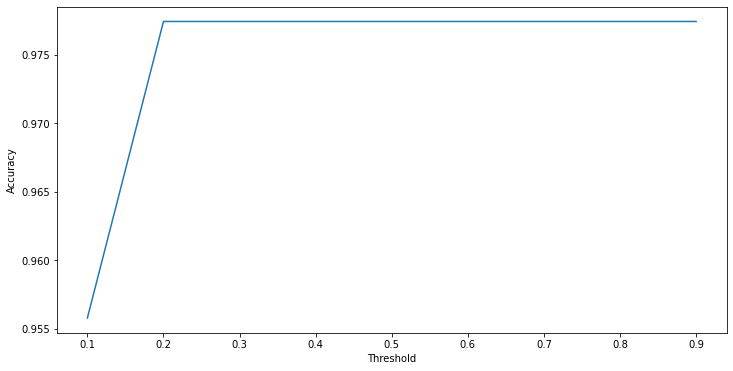

In [134]:
# ploting threshold value VS. the accuracy values
plt.figure(figsize=(12,6))
plt.plot(threshold_values, accuracies_test1)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show() 

<AxesSubplot:xlabel='FIRE'>

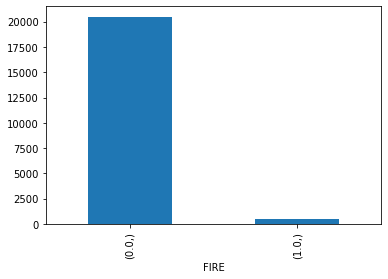

In [135]:
#Performing Decision tree on the Second model

#Plotting bar plot to find out the number of occurence in the training data set
y_train1.value_counts().plot.bar()

<AxesSubplot:xlabel='FIRE'>

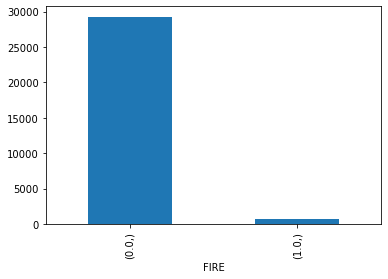

In [136]:
#Plotting the classification bar plot for the entire data
y_all.value_counts().plot.bar()

In [137]:
#since there is a constant term in X_train we should drop that
X_train1_D= X_train1.drop(['const'], axis=1)
X_test1_D = X_test1.drop(['const'], axis=1)
X_test1_D.head(10)

,GROUNDCOVER_Cultivated Crops,GROUNDCOVER_Deciduous Forest,"GROUNDCOVER_Developed, High Intensity","GROUNDCOVER_Developed, Low Intensity","GROUNDCOVER_Developed, Medium Intensity","GROUNDCOVER_Developed, Open Space",GROUNDCOVER_Emergent Herbaceous Wetlands,GROUNDCOVER_Evergreen Forest,GROUNDCOVER_Hay/Pasture,GROUNDCOVER_Herbaceous,GROUNDCOVER_Mixed Forest,GROUNDCOVER_Open Water,GROUNDCOVER_Perennial Snow/Ice,GROUNDCOVER_Shrub/Scrub,GROUNDCOVER_Woody Wetlands,DROUGHT_D1,DROUGHT_D2,DROUGHT_D3,DROUGHT_D4,DROUGHT_No Drought
8225,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
10794,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
9163,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
26591,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6631,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
14161,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
252,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2566,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3478,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2917,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [1]:
!pip3 install imblearn

In [138]:
#Since the number of occurence of the fire (1) is very less it is better to balance the data
#Also, since the data is very huge instead of over sampling we can performed undersampling
import imblearn
from imblearn import over_sampling
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')

X_train1U, y_train1U = undersample.fit_resample(X_train1_D, y_train1)

print("After oversampling: \n", y_train1U.apply(pd.value_counts))
print("After oversampling: \n", X_train1U.shape)

After oversampling: 
      FIRE
0.0   513
1.0   513
After oversampling: 
 (1026, 20)


In [139]:
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

SMOTE = SMOTE()
X_train1_Ov, y_train1_Ov = SMOTE.fit_resample(X_train1_D, y_train1)

print("After oversampling: \n", y_train1_Ov.apply(pd.value_counts))
print("After oversampling: \n", X_train1_Ov.shape)

After oversampling: 
       FIRE
0.0  20487
1.0  20487
After oversampling: 
 (40974, 20)


In [140]:
#Building a decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
dtc_U = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 7 , random_state = 0)

# Train Decision Tree Classifer
dtc_U = dtc_U.fit(X_train1U,y_train1U)
print("Decision Tree Classifier Created")

#Predict the response for test dataset
y_pred_U = dtc_U.predict(X_test1_D)

#Predicting the training model
y_train_pred_U = dtc_U.predict(X_train1U)

dtc_U.score(X_train1U, y_train1U)

Decision Tree Classifier Created


0.7651072124756335

In [63]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=6264262616e54fb07eee8112826babb92a76eabd16b30f188a3e8dc568052dc2
  Stored in directory: c:\users\vaibh\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [96]:
pip install graphviz

In [141]:
import seaborn as sns
from sklearn import tree
from numpy import random as rand
import pydotplus 
from IPython.display import Image
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, accuracy_score
import json
from imblearn.over_sampling import SMOTE

In [142]:
lst = y_all['FIRE'].unique().tolist()
lst= [str(i) for i in lst]
lst

['0.0', '1.0']

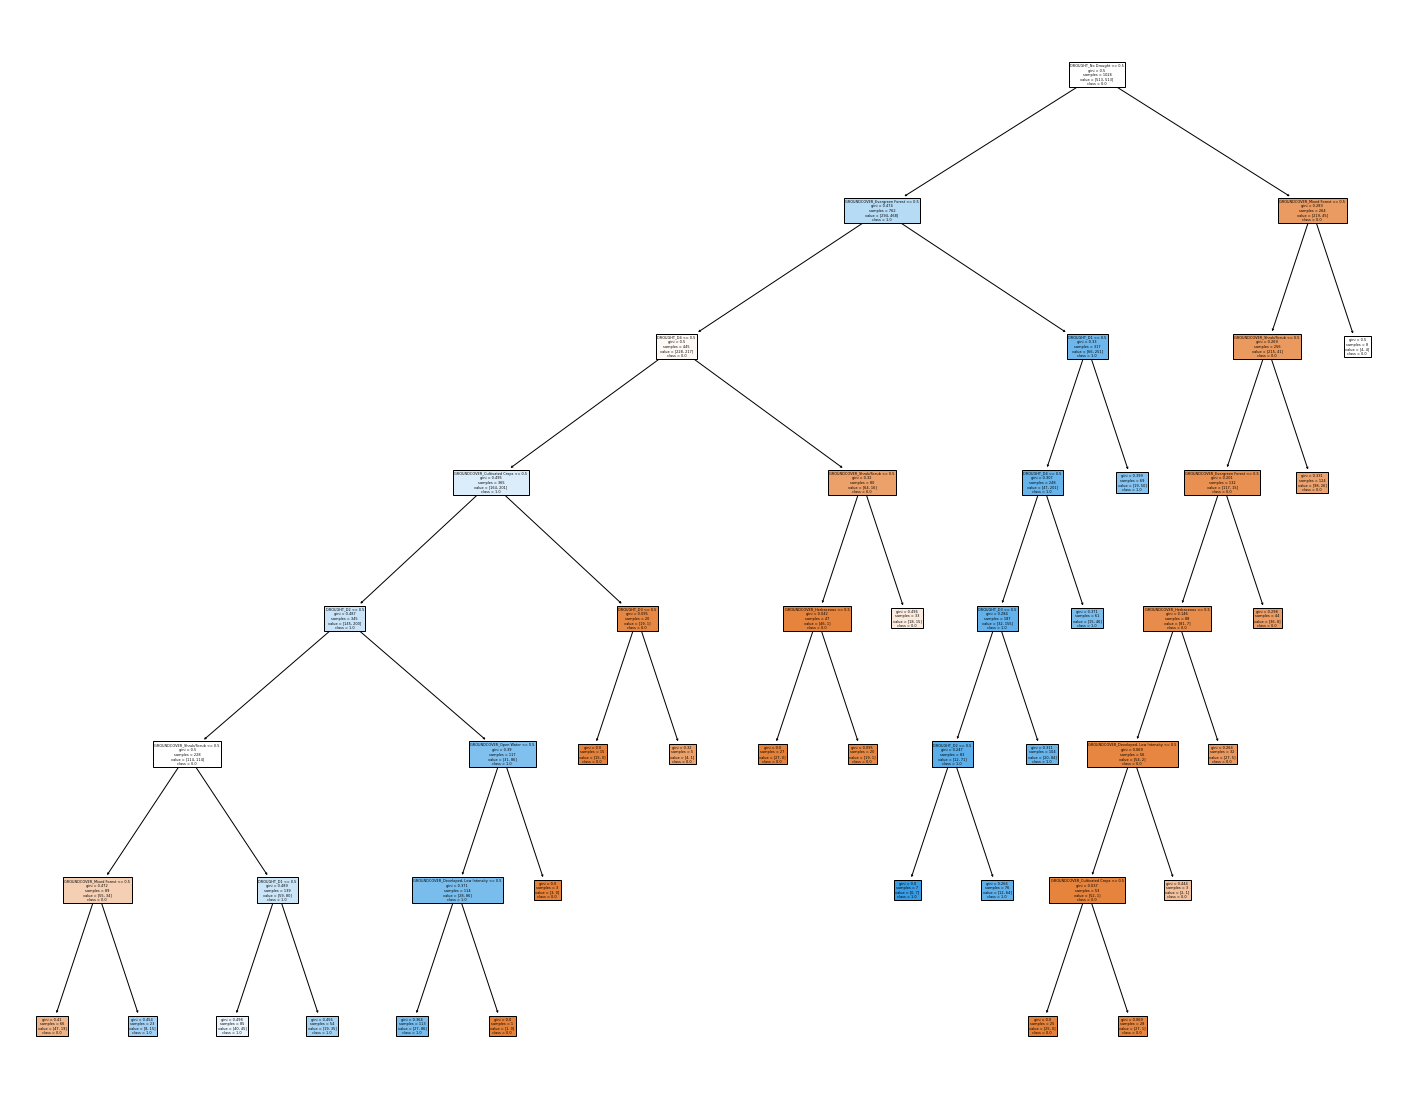

In [143]:
#plotting the decision tree
fig = plt.figure(figsize=(25,20))
dot_data = tree.plot_tree(dtc_U, 
                   feature_names=x_all.columns,  
                   class_names=lst,
                   filled=True)

[Text(0.78125, 0.9375, 'X[19] <= 0.5\ngini = 0.5\nsamples = 1026\nvalue = [513, 513]'),
 Text(0.6270161290322581, 0.8125, 'X[7] <= 0.5\ngini = 0.474\nsamples = 762\nvalue = [294, 468]'),
 Text(0.4798387096774194, 0.6875, 'X[18] <= 0.5\ngini = 0.5\nsamples = 445\nvalue = [228, 217]'),
 Text(0.3467741935483871, 0.5625, 'X[0] <= 0.5\ngini = 0.495\nsamples = 365\nvalue = [164, 201]'),
 Text(0.24193548387096775, 0.4375, 'X[16] <= 0.5\ngini = 0.487\nsamples = 345\nvalue = [145, 200]'),
 Text(0.12903225806451613, 0.3125, 'X[13] <= 0.5\ngini = 0.5\nsamples = 228\nvalue = [114, 114]'),
 Text(0.06451612903225806, 0.1875, 'X[10] <= 0.5\ngini = 0.472\nsamples = 89\nvalue = [55, 34]'),
 Text(0.03225806451612903, 0.0625, 'gini = 0.41\nsamples = 66\nvalue = [47, 19]'),
 Text(0.0967741935483871, 0.0625, 'gini = 0.454\nsamples = 23\nvalue = [8, 15]'),
 Text(0.1935483870967742, 0.1875, 'X[15] <= 0.5\ngini = 0.489\nsamples = 139\nvalue = [59, 80]'),
 Text(0.16129032258064516, 0.0625, 'gini = 0.498\nsampl

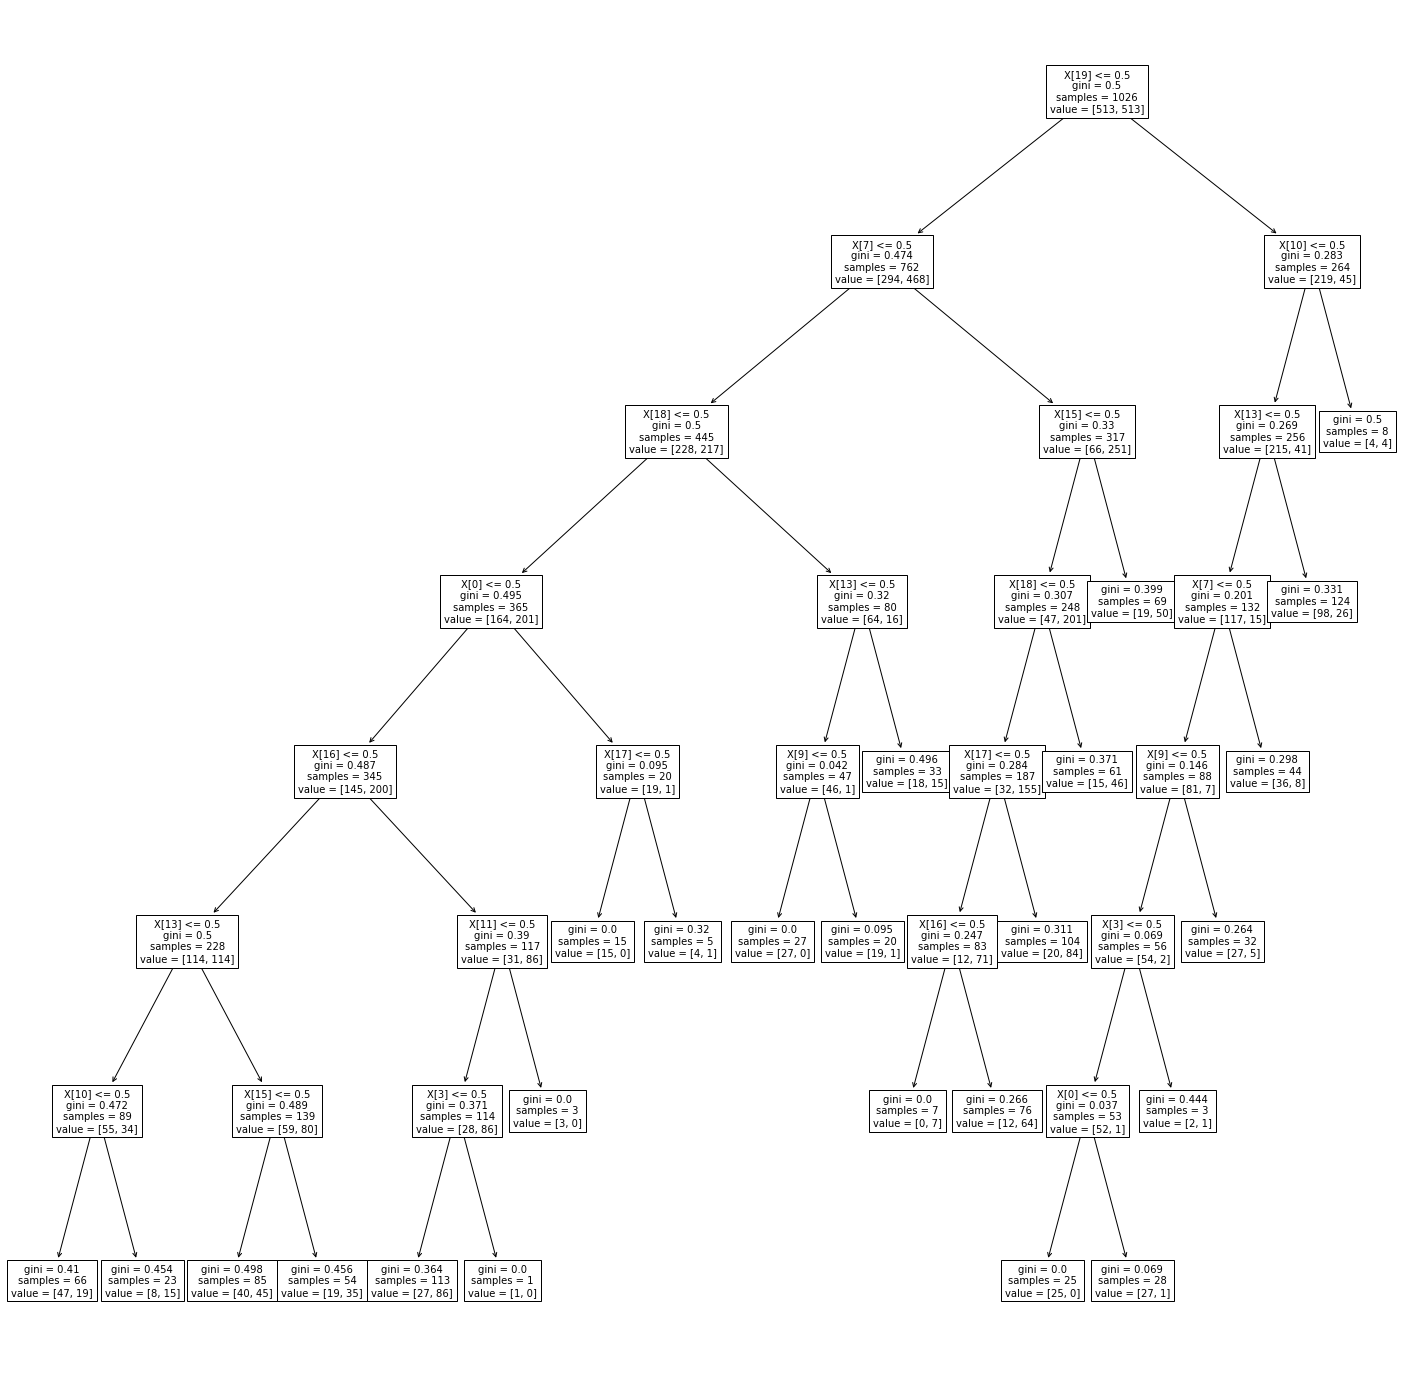

In [144]:
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(dtc_U, fontsize=10)


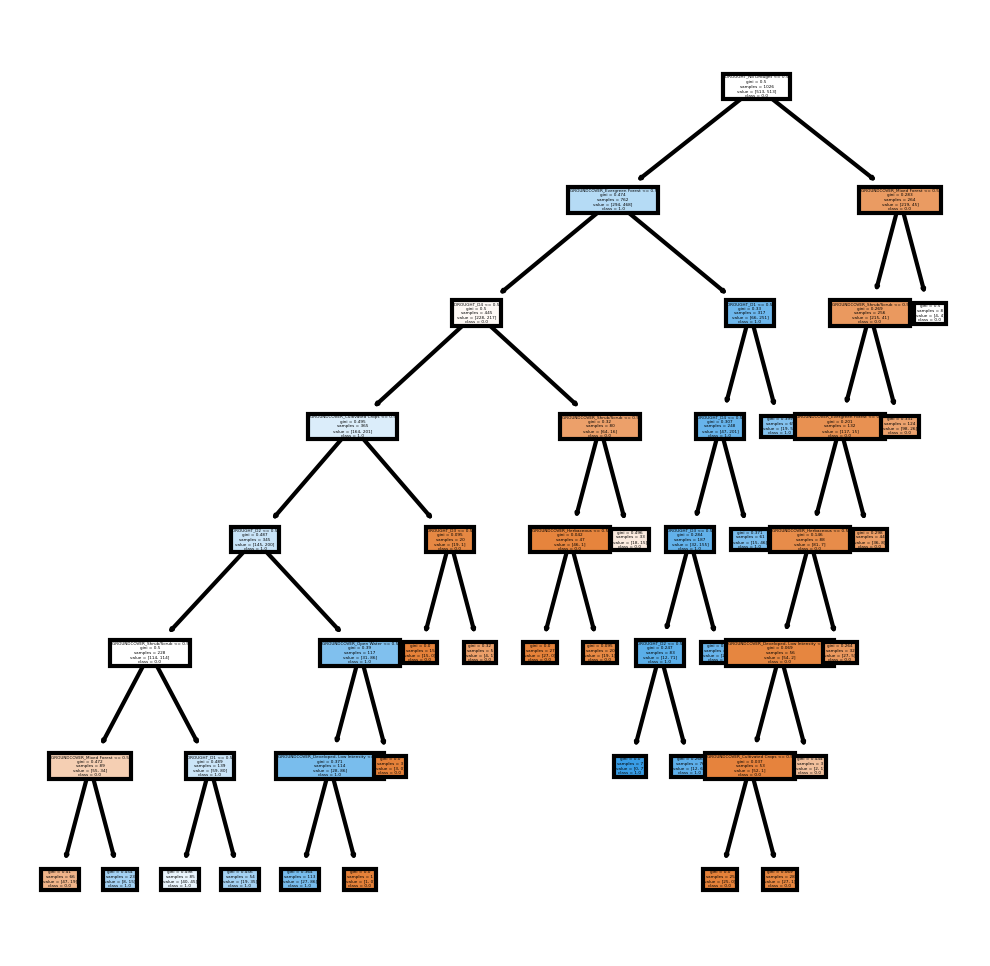

In [145]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc_U,
               feature_names = x_all.columns, 
               class_names=lst,
               filled = True)
fig.savefig('imagename.png')